- Previously, we saw that even adding a column of completely random noise can improve R2
- In general, we want D << N

```
N # # #  
N # # #  
N # # #  
N # # #  
N # I #           N # # # # # # # # # # # #  
N # D #           N # # # # # # # # # # # #  
N # E #           N # N O T # I D E A L # #   
N # A #           N # # # # # # # # # # # #  
N # L #           D D D D D D D D D D D D D
N # # #  
N # # #  
N # # #  
D D D D 
```

- Goal: Select a small number of important features that predict the trend
- Don't let the noise influence the output
- This is called sparsity - few weights are non-zero, most will be 0
- Achieved by LASSO / L1 regularization

$ J_{ridge} = \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda \vert \vert w \vert \vert_2 ^ 2$  

$ J_{lasso} = \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda \vert \vert w \vert \vert_1 $

- It is also a MAP estimation of w, with the prior being a Laplace distribution $$p(w) = \frac{\lambda}{2} exp(- \lambda \vert w \vert)$$

Taking the derivative of $J_{lasso}$:

$ J = (Y - Xw)^T (Y - Xw) + \lambda \vert w \vert $  
$ J = Y^T - 2 Y^T X w + w^T X^T X w + \lambda \vert w$  
$ \partial J / \partial w = - 2 X^T Y + 2 X^T X w + \lambda sign(w) = 0 $  
$sign(x) =$ 1 if x > 0, -1, if x < 0, 0 if x = 0. Since its inverse is not a function, we cannot solve for w analytically.

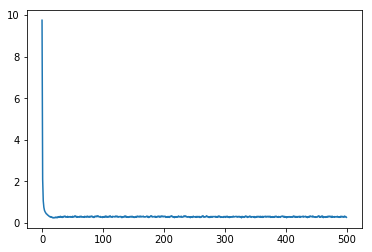

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a dataset with more features than relevant
N = 50
D = 50

X = (np.random.random((N, D)) - 0.5) * 10

true_w = np.array([1, 0.5, -0.5] + [0] * (D-3))

Y = X.dot(true_w) + np.random.randn(N) * 0.5

costs = []

learning_rate = 0.001
l1 = 10
T = 500
w = np.random.randn(D) / np.sqrt(D)
for t in range(T):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate * (X.T.dot(delta) + l1 * np.sign(w))
    mse = delta.dot(delta) / N
    costs.append(mse)
    
plt.plot(costs)

final w [  9.63415962e-01   4.08105745e-01  -4.49199815e-01   1.19717622e-02
   1.21426400e-03  -2.88155031e-02   5.91097829e-03  -5.87705929e-03
  -9.42269341e-03  -1.11852209e-02   1.11469476e-02   1.08160730e-02
  -1.02776326e-03  -1.76248776e-02  -1.12333934e-02  -7.60614941e-03
   2.88922903e-03  -3.69706009e-04   1.39878800e-02  -2.37455552e-03
  -3.13577396e-02  -2.29176863e-02   6.06346842e-03   1.00648049e-02
  -1.05369973e-02  -3.22228469e-02   2.82013585e-02   8.78506364e-03
  -1.59106772e-02   1.90069699e-02   2.57287962e-02  -6.38434687e-03
   9.46185805e-03   2.10108333e-03   5.01584794e-03  -4.73903301e-03
   9.83951861e-03   3.10240131e-03  -7.06266796e-03  -2.38323224e-02
   5.96755473e-03  -1.19195332e-02  -3.70198483e-05  -2.45092012e-02
  -1.21487343e-02  -8.50538339e-03  -9.90463388e-04   1.30795020e-02
  -1.71032637e-03  -8.44927206e-03]


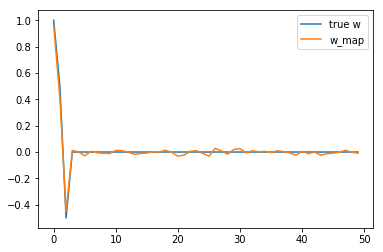

In [7]:
print("final w", w)
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()